In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded=files.upload()


Saving train.csv to train.csv


In [ ]:
train=pd.read_csv("train.csv")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test.csv


In [ ]:
test=pd.read_csv("test.csv")

In [ ]:
pd.set_option('display.max_columns',10,'display.width',1000)
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
 train.groupby('Survived')

In [ ]:
print(train.groupby(['Survived']).groups)

{0: [0, 4, 5, 6, 7, 12, 13, 14, 16, 18, 20, 24, 26, 27, 29, 30, 33, 34, 35, 37, 38, 40, 41, 42, 45, 46, 48, 49, 50, 51, 54, 57, 59, 60, 62, 63, 64, 67, 69, 70, 71, 72, 73, 75, 76, 77, 80, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 99, 100, 101, 102, 103, 104, 105, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 129, 130, 131, 132, 134, 135, 137, 138, 139, 140, 143, 144, 145, 147, 148, 149, 150, 152, 153, ...], 1: [1, 2, 3, 8, 9, 10, 11, 15, 17, 19, 21, 22, 23, 25, 28, 31, 32, 36, 39, 43, 44, 47, 52, 53, 55, 56, 58, 61, 65, 66, 68, 74, 78, 79, 81, 82, 84, 85, 88, 97, 98, 106, 107, 109, 123, 125, 127, 128, 133, 136, 141, 142, 146, 151, 156, 161, 165, 166, 172, 183, 184, 186, 187, 190, 192, 193, 194, 195, 198, 204, 207, 208, 209, 211, 215, 216, 218, 220, 224, 226, 230, 233, 237, 241, 247, 248, 255, 256, 257, 258, 259, 261, 267, 268, 269, 271, 272, 274, 275, 279, ...]}


In [ ]:
train.groupby(['Survived']).size()

Survived
0    549
1    342
dtype: int64

In [ ]:
non_numeric_cols = train.select_dtypes(include='object').columns
print(f"Non-numeric columns: {non_numeric_cols}")

Non-numeric columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [ ]:
male_ind=len(train[train['Sex']== 'male'])
print("no of males in the titanic:",male_ind)

no of males in the titanic: 577


In [ ]:
female_ind=len(train[train['Sex']== 'female'])
print("no of females in the titanic:",female_ind)

no of females in the titanic: 314


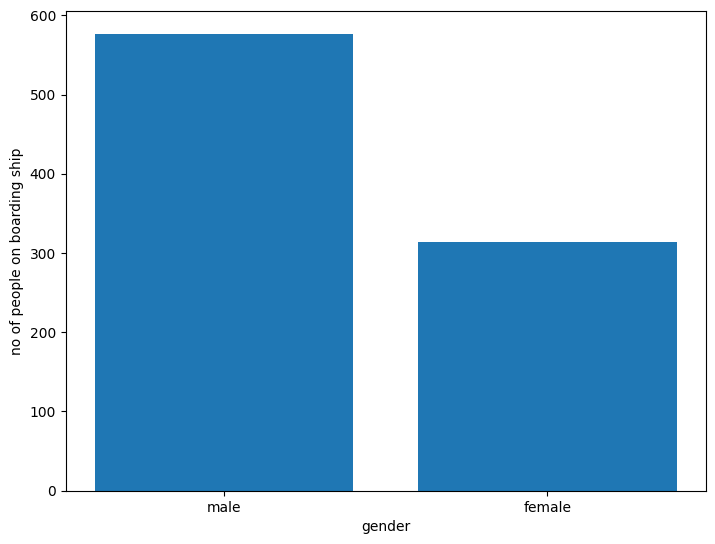

In [ ]:
fig=plt.figure()
ax= fig.add_axes([0,0,1,1])
gender=['male','female']
index=[577,314]
ax.bar(gender,index)
plt.xlabel("gender")
plt.ylabel("no of people on boarding ship")
plt.show()

In [ ]:
alive=len(train[train['Survived']==1])
dead=len(train[train['Survived']==0])

In [ ]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


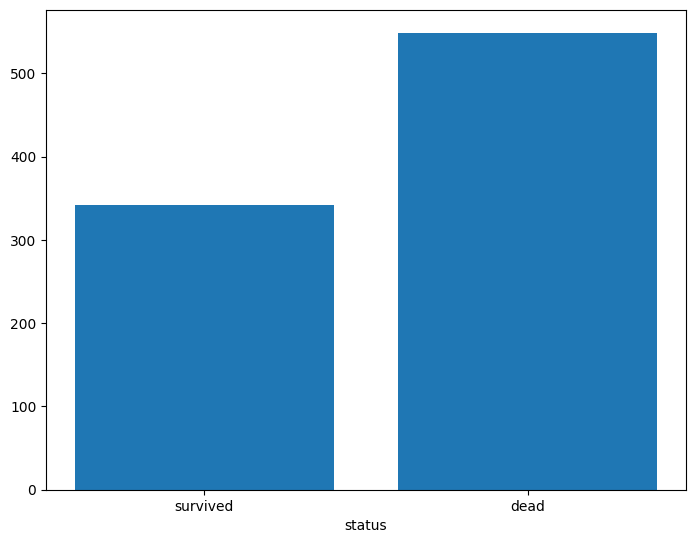

In [ ]:
fig=plt.figure()
ax= fig.add_axes([0,0,1,1])
status=['survived','dead']
ind=[alive,dead]
ax.bar(status,ind)
plt.xlabel("status")
plt.show()

Text(0.5, 1.0, 'bar graph of people according to ticket class in which people could not survive')

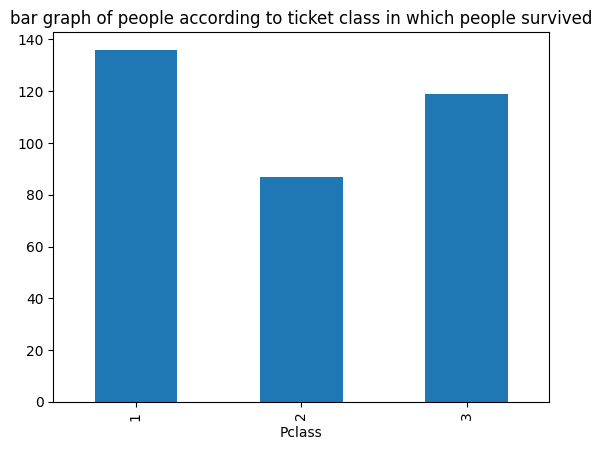

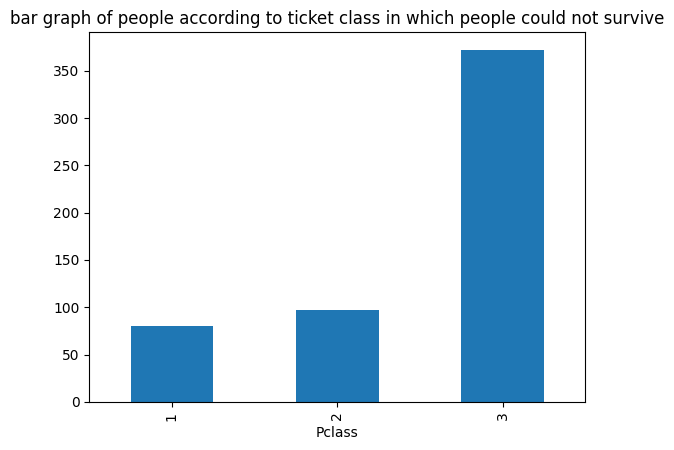

In [ ]:
plt.figure(1)
train.loc[train['Survived']==1,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('bar graph of people according to ticket class in which people survived')


plt.figure(2)
train.loc[train['Survived']==0,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('bar graph of people according to ticket class in which people could not survive')

([<matplotlib.axis.XTick at 0x79e41c3af040>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

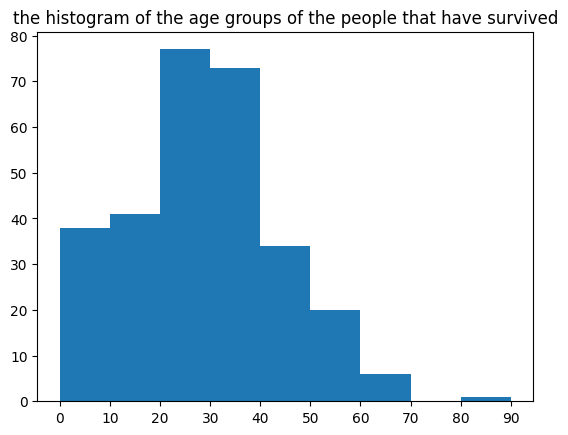

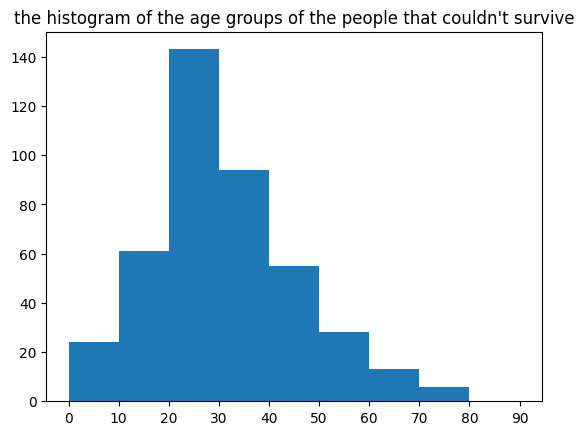

In [ ]:
plt.figure(1)
age = train.loc[train.Survived==1,'Age']
plt.title('the histogram of the age groups of the people that have survived')
plt.hist (age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

plt.figure(2)
age = train.loc[train.Survived == 0, 'Age']
plt.title('the histogram of the age groups of the people that couldn\'t survive')
plt.hist(age, np.arange(0, 100, 10))
plt.xticks(np.arange(0, 100, 10))


In [ ]:
train[["SibSp","Survived"]].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train[["Pclass","Survived"]].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train[["Age","Survived"]].groupby(['Age'],as_index=False).mean().sort_values("Age",ascending= True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [ ]:
train[["Embarked","Survived"]].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending= False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


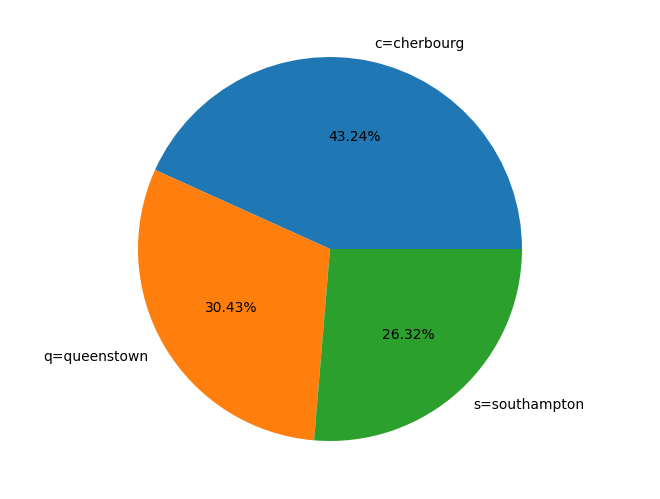

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
l=['c=cherbourg','q=queenstown','s=southampton']
s=[0.553571, 0.389610, 0.336957]
ax.pie(s, labels=l, autopct='%1.2f%%')
plt.show()

In [ ]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,...,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,...,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,...,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,...,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,...,0.000000,NaN,31.500000,NaN,NaN


In [ ]:
train=train.drop(['Ticket'], axis=1)
test=test.drop(['Ticket'], axis=1)

In [ ]:
train=train.drop(['Cabin'], axis=1)
test=test.drop(['Cabin'], axis=1)

In [ ]:
train=train.drop(['Name'], axis=1)
test=test.drop(['Name'], axis=1)

In [ ]:
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
x=train[column_train]
y=train['Survived']

In [ ]:
x=train[column_train]
y=train['Survived']

In [ ]:
x['Age'].isnull().sum()
x['Pclass'].isnull().sum()
x['SibSp'].isnull().sum()
x['Parch'].isnull().sum()
x['Fare'].isnull().sum()
x['Sex'].isnull().sum()
x['Embarked'].isnull().sum()

2

In [ ]:
x['Age']=x['Age'].fillna(x['Age'].median())
x['Age'].isnull().sum()

0

In [ ]:
x['Embarked']=train['Embarked'].fillna(method='Pad')
x['Embarked'].isnull().sum()

0

In [ ]:
d = {'male':0,'female':1}
x['Sex'] = x['Sex'].apply(lambda x:d[x])
x['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [ ]:
e = {'C':0,'Q':1,'S':2}
x['Embarked'] = x['Embarked'].apply(lambda x:e[x])
x['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.7574626865671642


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_mat= confusion_matrix(y_test,y_pred)
print(confusion_mat)


[[130  26]
 [ 39  73]]


In [ ]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(x_train, y_train)
pred_y = model1.predict(x_test)
from sklearn.metrics import accuracy_score
print("Acc=", accuracy_score (y_test, pred_y))

Acc= 0.6604477611940298


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_mat=confusion_matrix(y_test, pred_y)
print(confusion_mat)
print(classification_report(y_test, pred_y))

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



In [ ]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.7686567164179104


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

confusion_mat = confusion_matrix(y_test, y_pred3)
print(confusion_mat)
print(classification_report(y_test, y_pred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [ ]:
from sklearn.tree import DecisionTreeClassifier

model4 = DecisionTreeClassifier(criterion='entropy', random_state=7)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_test,y_pred4))


Accuracy Score: 0.7425373134328358


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
confusion_mat = confusion_matrix(y_test,y_pred4)
print(classification_report (y_test,y_pred4))
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268

[[132  24]
 [ 45  67]]


In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Naive Bayes', 'KNN', 'Decision Tree'],
    'Score': [0.75, 0.66, 0.76, 0.66, 0.74]})

result_df = results.sort_values(by='Score', ascending=False)

result_df = result_df.set_index('Score')

result_df.head(9)

,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,KNN
